<a href="https://colab.research.google.com/github/Alzora2025/Portofolio_project/blob/main/Sales_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pfrom google.colab import files
uploaded = files.upload()


Saving sales_data.csv to sales_data (4).csv


meunggah Dataset ke Google Colab

memuat Kumpulan Data ke Pandas DataFrame

In [ ]:
import pandas as pd

# Load the uploaded dataset
df = pd.read_csv('sales_data.csv')

# Tampilkan 5 baris pertama
df.head()


,Date,Category,Location,Units Sold,Price per Unit,Total Revenue
0,2024-05-21,Clothing,Houston,35,319.06,11167.10
1,2024-01-03,Clothing,New York,31,461.69,14312.39
2,2024-04-25,Furniture,New York,23,96.16,2211.68
3,2024-04-06,Furniture,Los Angeles,45,339.62,15282.90
4,2024-01-13,Groceries,Los Angeles,39,246.14,9599.46


Informasi Dataset : Periksa informasi umum tentang data.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            500 non-null    object 
 1   Category        500 non-null    object 
 2   Location        500 non-null    object 
 3   Units Sold      500 non-null    int64  
 4   Price per Unit  500 non-null    float64
 5   Total Revenue   500 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 23.6+ KB


Statistik Deskriptif : Dapatkan ringkasan statistik.

In [ ]:
df.describe()


,Units Sold,Price per Unit,Total Revenue
count,500.000000,500.000000,500.000000
mean,24.192000,255.852440,5968.903340
std,14.817904,141.300086,5279.141453
min,1.000000,5.320000,27.220000
25%,11.000000,138.825000,1728.210000
50%,23.000000,268.815000,4496.610000
75%,37.000000,375.345000,8663.122500
max,50.000000,499.810000,23491.070000


Cek Nilai Kosong : Pastikan tidak ada data yang hilang.





In [ ]:
df.isnull().sum()


,0
Date,0
Category,0
Location,0
Units Sold,0
Price per Unit,0
Total Revenue,0


Eksplorasi Data (EDA)

Total penjualan per kategori:

In [ ]:
category_sales = df.groupby('Category')['Total Revenue'].sum().sort_values(ascending=False)
print(category_sales)


Category
Books          755975.26
Clothing       702715.55
Groceries      544507.69
Electronics    505725.17
Furniture      475528.00
Name: Total Revenue, dtype: float64


Visualisasi penjualan:

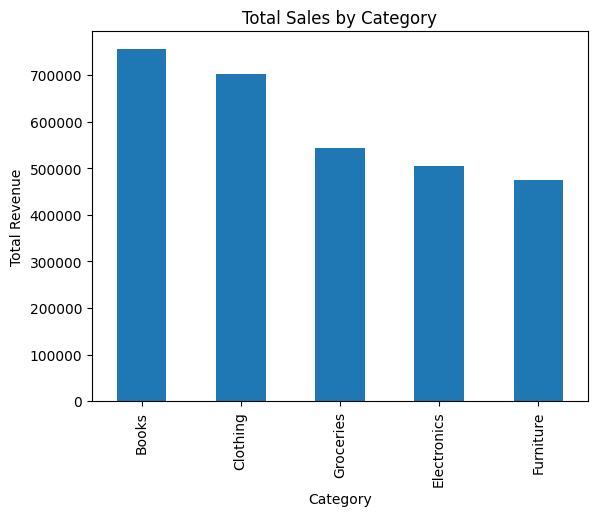

In [ ]:
import matplotlib.pyplot as plt

category_sales.plot(kind='bar', title='Total Sales by Category', ylabel='Total Revenue')
plt.show()


Analisis Penjualan Berdasarkan Waktu

Total Penjualan per Bulan

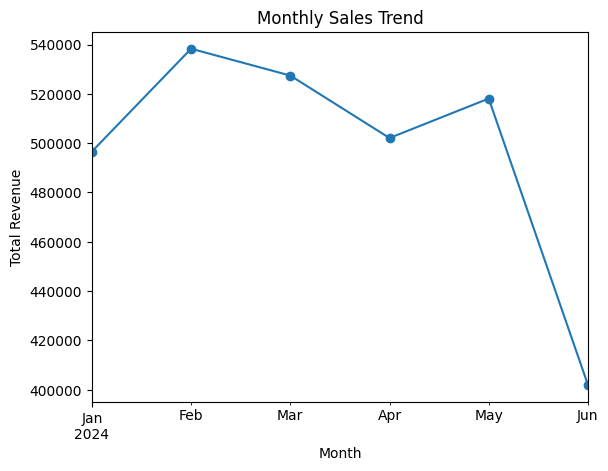

In [ ]:
# Tambahkan kolom bulan
df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M')

# Total penjualan per bulan
monthly_sales = df.groupby('Month')['Total Revenue'].sum()

# Plot
monthly_sales.plot(kind='line', title='Monthly Sales Trend', marker='o')
plt.ylabel('Total Revenue')
plt.show()


Hari Penjualan Tertinggi

In [ ]:
top_day = df.loc[df['Total Revenue'].idxmax()]
print("Hari dengan penjualan tertinggi:")
print(top_day)


Hari dengan penjualan tertinggi:
Date              2024-06-07
Category           Groceries
Location             Phoenix
Units Sold                47
Price per Unit        499.81
Total Revenue       23491.07
Month                2024-06
Name: 55, dtype: object


Total Penjualan per Lokasi

Location
Houston        696190.01
Los Angeles    631229.51
Chicago        564514.89
New York       556096.58
Phoenix        536420.68
Name: Total Revenue, dtype: float64


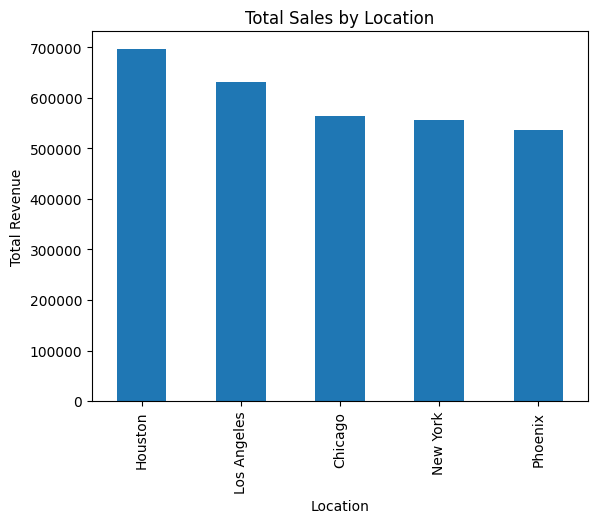

In [ ]:
location_sales = df.groupby('Location')['Total Revenue'].sum().sort_values(ascending=False)
print(location_sales)

# Visualisasi
location_sales.plot(kind='bar', title='Total Sales by Location', ylabel='Total Revenue')
plt.show()


Model Prediksi Penjualan (Opsional)

Pisahkan Data

In [ ]:
from sklearn.model_selection import train_test_split

# Fitur dan target
X = df[['Units Sold', 'Price per Unit']]
y = df['Total Revenue']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Kereta Api

In [ ]:
from sklearn.linear_model import LinearRegression


Latih Model Regresi Linier

In [ ]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

print("Model telah dilatih.")


Model telah dilatih.


Evaluasi Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Hitung Mean Squared Error (MSE) dan R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")


Mean Squared Error (MSE): 4806911.345644553
R-squared: 0.8370869912218434


analisis hasil

Bandingkan Prediksi dengan Nilai Sebenarnya

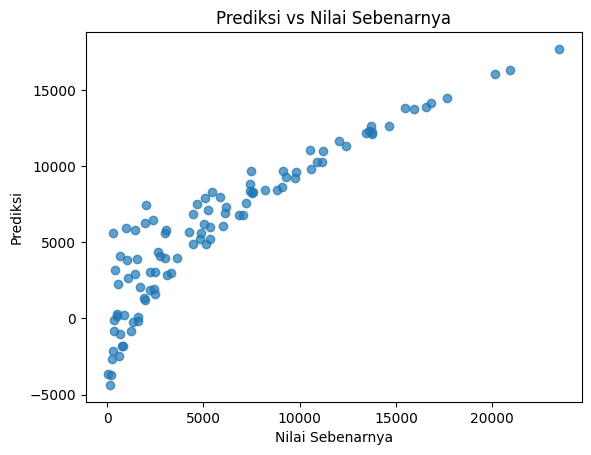

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.title("Prediksi vs Nilai Sebenarnya")
plt.xlabel("Nilai Sebenarnya")
plt.ylabel("Prediksi")
plt.show()


Simpan dan Dokumentasikan Proyek

In [ ]:
import joblib

# Simpan model
joblib.dump(model, "sales_prediction_model.pkl")
print("Model disimpan sebagai 'sales_prediction_model.pkl'")


Model disimpan sebagai 'sales_prediction_model.pkl'
